# Merge, Join and Concat

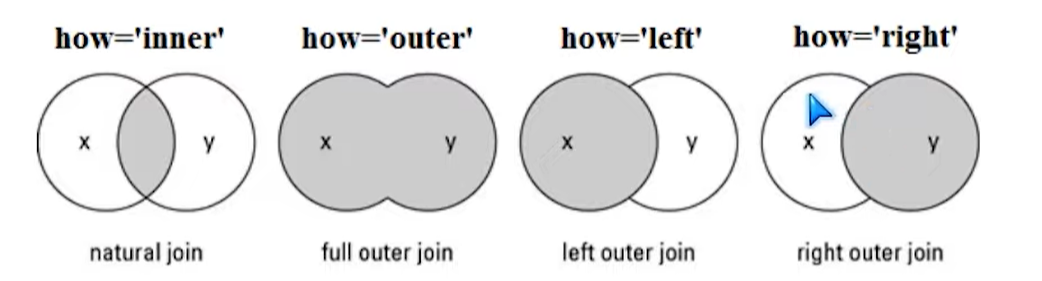

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("LOTR.csv")
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [4]:
df2 = pd.read_csv("LOTR 2.csv")
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


### Merge

**Merge DataFrame or named Series objects with a database-style join.**

Syntax:
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

### inner join

In [7]:
# By default it will be inner join

# ------ Inner Join ----------
df1.merge(right=df2)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [8]:
# Merge on "FellowshipID"
df1.merge(right=df2, how='inner', on='FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [9]:
# Merge on "FellowshipID" and "FirstName"
df1.merge(right=df2, how='inner', on=['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [10]:
# Merge on "FirstName"
df1.merge(right=df2, how='inner', on=['FirstName'])

,FellowshipID_x,FirstName,Skills,FellowshipID_y,Age
0,1001,Frodo,Hiding,1001,50
1,1002,Samwise,Gardening,1002,39


### outer join

In [12]:
df1, df2

(   FellowshipID FirstName     Skills
 0          1001     Frodo     Hiding
 1          1002   Samwise  Gardening
 2          1003   Gandalf     Spells
 3          1004    Pippin  Fireworks,
    FellowshipID FirstName   Age
 0          1001     Frodo    50
 1          1002   Samwise    39
 2          1006   Legolas  2931
 3          1007    Elrond  6520
 4          1008  Barromir    51)

In [13]:
df1.merge(right=df2, how='outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


### left join

In [15]:
df1, df2

(   FellowshipID FirstName     Skills
 0          1001     Frodo     Hiding
 1          1002   Samwise  Gardening
 2          1003   Gandalf     Spells
 3          1004    Pippin  Fireworks,
    FellowshipID FirstName   Age
 0          1001     Frodo    50
 1          1002   Samwise    39
 2          1006   Legolas  2931
 3          1007    Elrond  6520
 4          1008  Barromir    51)

In [16]:
df1.merge(right=df2, how='left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


### right join

In [18]:
df1.merge(right=df2, how="right")

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


### cross join

In [20]:
df1, df2

(   FellowshipID FirstName     Skills
 0          1001     Frodo     Hiding
 1          1002   Samwise  Gardening
 2          1003   Gandalf     Spells
 3          1004    Pippin  Fireworks,
    FellowshipID FirstName   Age
 0          1001     Frodo    50
 1          1002   Samwise    39
 2          1006   Legolas  2931
 3          1007    Elrond  6520
 4          1008  Barromir    51)

In [21]:
# df1.merge(right=df2, how='cross')

## JOIN --> instead use merge

## Concat

In [24]:
pd.concat(objs=[df1, df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [25]:
# join in concat
pd.concat(objs=[df1, df2], join='inner')

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [26]:
pd.concat(objs=[df1, df2], join='outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [27]:
pd.concat(objs=[df1, df2], join='outer', axis=1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51
